# Wordle Reinforcement Experiments

## Imports and Config

In [1]:
import sys
sys.path.append('../..')

In [2]:
import src.config as src_config
from src.models import qlearn, sarsa, dqn, a2c

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Config Changes

In [4]:
q_learn_config = {'epsilon': 0.02, 'gamma': 0.05, 'alpha': 0.02}
sarsa_config = {'epsilon': 0.02, 'gamma': 0.05, 'alpha': 0.02}
dqn_config = {'epsilon': 0.8, 'gamma': 0.9, 'alpha': 0.01}
a2c_config = {'epsilon': 0.8, 'gamma': 0.9, 'alpha': 0.01}
trials = 100
iters = 20

In [5]:
# Rewards

src_config.WIN_REWARD = 25
src_config.LOSE_REWARD = -15
src_config.GREEN_REWARD = 5
src_config.YELLOW_REWARD = 3
src_config.GREY_REWARD = -1

## Q - Learning

In [6]:
model = qlearn.QLearn(q_learn_config)

In [7]:
train_solves = []
test_solves = []
for i in range(iters):
    model.train(trials)
    model.update_q(model.Q)
    train_solves.append(len(model.games_solved))
    res = model.test(verbose=False)
    print(f'Games solved: {len(model.games_solved)}/{trials}')
    print(f'Test solved: {i}: {res["solved"]}')
    if(res['solved']):
        test_solves.append(i)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:26<00:00,  3.80it/s]


Games solved: 6/100
Test solved: 0: False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:28<00:00,  3.49it/s]


Games solved: 7/100
Test solved: 1: False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:53<00:00,  1.86it/s]


Games solved: 15/100
Test solved: 2: True


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:39<00:00,  2.55it/s]


Games solved: 13/100
Test solved: 3: False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:32<00:00,  3.12it/s]


Games solved: 18/100
Test solved: 4: False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:38<00:00,  2.57it/s]


Games solved: 12/100
Test solved: 5: False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:37<00:00,  2.70it/s]


Games solved: 28/100
Test solved: 6: True


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:41<00:00,  2.39it/s]


Games solved: 16/100
Test solved: 7: False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:40<00:00,  2.47it/s]


Games solved: 15/100
Test solved: 8: False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:38<00:00,  2.56it/s]


Games solved: 18/100
Test solved: 9: False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:39<00:00,  2.50it/s]


Games solved: 15/100
Test solved: 10: False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:41<00:00,  2.42it/s]


Games solved: 13/100
Test solved: 11: False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:44<00:00,  2.26it/s]


Games solved: 16/100
Test solved: 12: False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:32<00:00,  3.10it/s]


Games solved: 21/100
Test solved: 13: False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:41<00:00,  2.41it/s]


Games solved: 12/100
Test solved: 14: False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:47<00:00,  2.10it/s]


Games solved: 25/100
Test solved: 15: False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:45<00:00,  2.21it/s]


Games solved: 18/100
Test solved: 16: False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:49<00:00,  2.02it/s]


Games solved: 17/100
Test solved: 17: False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:32<00:00,  3.05it/s]


Games solved: 16/100
Test solved: 18: False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:38<00:00,  2.62it/s]


Games solved: 17/100
Test solved: 19: False


Text(0.5, 1.0, 'Test Games solved: 2/20')

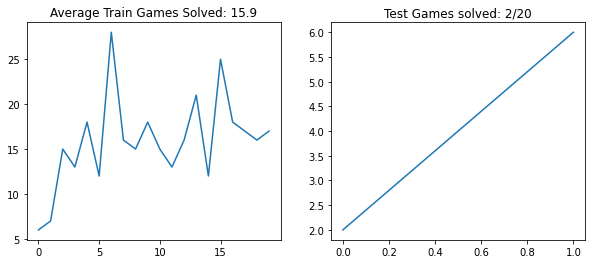

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(list(range(len(train_solves))), train_solves)
axs[0].set_title(f'Average Train Games Solved: {sum(train_solves)/iters}')
axs[1].plot(list(range(len(test_solves))), test_solves)
axs[1].set_title(f'Test Games solved: {len(test_solves)}/{iters}')

In [9]:
q_table = model.Q
actions = pd.DataFrame(columns=['# Green', '# Yellow', 'Game State', 'Action'])
print(f'Q values shape: {q_table.shape}') #Num green, Num yellow, game step, action
q_actions = np.argmax(q_table, axis=3)
for green in range(src_config.WORD_LENGTH):
    for yellow in range(src_config.WORD_LENGTH-green):
        for state in range(src_config.GAME_LENGTH):
            action = model.strategies[q_actions[green, yellow, state]].__class__.__name__[:-8]
            actions = actions.append({'# Green': green, '# Yellow': yellow, 'Game State': state, 'Action': action}, ignore_index=True)
actions.pivot(index=['# Green', '# Yellow'], columns=['Game State'], values=['Action'])
            

Q values shape: (6, 6, 7, 3)


Action                                                   \
Game State                0          1               2          3          4   
# Green # Yellow                                                               
0       0         HighestLL  HighestLL       HighestLL  HighestLL  HighestLL   
        1         HighestLL  HighestLL       HighestLL  HighestLL  HighestLL   
        2         HighestLL  HighestLL       HighestLL  HighestLL  HighestLL   
        3         HighestLL  HighestLL       HighestLL  HighestLL  HighestLL   
        4         HighestLL  HighestLL       HighestLL  HighestLL  HighestLL   
1       0         HighestLL  HighestLL       HighestLL  HighestLL  HighestLL   
        1         HighestLL  HighestLL       HighestLL  HighestLL  HighestLL   
        2         HighestLL  HighestLL       HighestLL  HighestLL  HighestLL   
        3         HighestLL  HighestLL       HighestLL  HighestLL  HighestLL   
2       0         HighestLL  HighestLL       HighestLL  HighestLL  HighestLL   
        1         HighestLL  HighestLL  HighestLLSmart  HighestLL  HighestLL   
        2         HighestLL  HighestLL       HighestLL  HighestLL  HighestLL   
3       0         HighestLL  HighestLL    FreshLetters  HighestLL  HighestLL   
        1         HighestLL  HighestLL       HighestLL  HighestLL  HighestLL   
4       0         HighestLL  HighestLL       HighestLL  HighestLL  HighestLL   

                                  
Game State                     5  
# Green # Yellow                  
0       0              HighestLL  
        1              HighestLL  
        2         HighestLLSmart  
        3         HighestLLSmart  
        4              HighestLL  
1       0              HighestLL  
        1           FreshLetters  
        2           FreshLetters  
        3         HighestLLSmart  
2       0              HighestLL  
        1              HighestLL  
        2         HighestLLSmart  
3       0           FreshLetters  
        1         HighestLLSmart  
4       0         HighestLLSmart

## SARSA

In [6]:
model1 = sarsa.SARSALearn(sarsa_config)

In [7]:
train_solves = []
test_solves = []
for i in range(iters):
    model1.train(trials)
    model1.update_q(model1.Q)
    train_solves.append(len(model1.games_solved))
    res = model1.test(verbose=False)
    print(f'Games solved: {len(model1.games_solved)}/{trials}')
    print(f'Test solved: {i}: {res["solved"]}')
    if(res['solved']):
        test_solves.append(i)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:58<00:00,  1.72it/s]


Games solved: 40/100
Test solved: 0: True


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:03<00:00,  1.58it/s]


Games solved: 37/100
Test solved: 1: False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:04<00:00,  1.55it/s]


Games solved: 37/100
Test solved: 2: True


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:04<00:00,  1.55it/s]


Games solved: 35/100
Test solved: 3: True


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:01<00:00,  1.63it/s]


Games solved: 39/100
Test solved: 4: True


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:06<00:00,  1.51it/s]


Games solved: 41/100
Test solved: 5: False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:10<00:00,  1.41it/s]


Games solved: 38/100
Test solved: 6: False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:55<00:00,  1.80it/s]


Games solved: 45/100
Test solved: 7: True


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:52<00:00,  1.92it/s]


Games solved: 34/100
Test solved: 8: True


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:07<00:00,  1.47it/s]


Games solved: 45/100
Test solved: 9: True


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:48<00:00,  2.05it/s]


Games solved: 40/100
Test solved: 10: False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:09<00:00,  1.44it/s]


Games solved: 44/100
Test solved: 11: True


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:55<00:00,  1.80it/s]


Games solved: 47/100
Test solved: 12: False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:48<00:00,  2.04it/s]


Games solved: 39/100
Test solved: 13: False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:50<00:00,  2.00it/s]


Games solved: 38/100
Test solved: 14: False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:15<00:00,  1.32it/s]


Games solved: 45/100
Test solved: 15: False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:54<00:00,  1.85it/s]


Games solved: 43/100
Test solved: 16: True


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:53<00:00,  1.86it/s]


Games solved: 45/100
Test solved: 17: False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:58<00:00,  1.70it/s]


Games solved: 44/100
Test solved: 18: False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:19<00:00,  1.26it/s]


Games solved: 48/100
Test solved: 19: False


Text(0.5, 1.0, 'Test Games solved: 9/20')

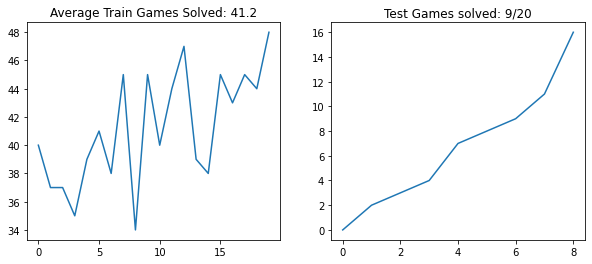

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(list(range(len(train_solves))), train_solves)
axs[0].set_title(f'Average Train Games Solved: {sum(train_solves)/iters}')
axs[1].plot(list(range(len(test_solves))), test_solves)
axs[1].set_title(f'Test Games solved: {len(test_solves)}/{iters}')

In [9]:
q_table = model1.Q
actions = pd.DataFrame(columns=['# Green', '# Yellow', 'Game State', 'Action'])
print(f'Q values shape: {q_table.shape}') #Num green, Num yellow, game step, action
q_actions = np.argmax(q_table, axis=3)
for green in range(src_config.WORD_LENGTH):
    for yellow in range(src_config.WORD_LENGTH-green):
        for state in range(src_config.GAME_LENGTH):
            action = model1.strategies[q_actions[green, yellow, state]].__class__.__name__[:-8]
            actions = actions.append({'# Green': green, '# Yellow': yellow, 'Game State': state, 'Action': action}, ignore_index=True)
actions.pivot(index=['# Green', '# Yellow'], columns=['Game State'], values=['Action'])
            

Q values shape: (6, 6, 7, 3)


Action                                        \
Game State                0          1          2               3   
# Green # Yellow                                                    
0       0         HighestLL  HighestLL  HighestLL       HighestLL   
        1         HighestLL  HighestLL  HighestLL       HighestLL   
        2         HighestLL  HighestLL  HighestLL       HighestLL   
        3         HighestLL  HighestLL  HighestLL       HighestLL   
        4         HighestLL  HighestLL  HighestLL       HighestLL   
1       0         HighestLL  HighestLL  HighestLL       HighestLL   
        1         HighestLL  HighestLL  HighestLL       HighestLL   
        2         HighestLL  HighestLL  HighestLL       HighestLL   
        3         HighestLL  HighestLL  HighestLL       HighestLL   
2       0         HighestLL  HighestLL  HighestLL       HighestLL   
        1         HighestLL  HighestLL  HighestLL       HighestLL   
        2         HighestLL  HighestLL  HighestLL       HighestLL   
3       0         HighestLL  HighestLL  HighestLL  HighestLLSmart   
        1         HighestLL  HighestLL  HighestLL       HighestLL   
4       0         HighestLL  HighestLL  HighestLL       HighestLL   

                                                  
Game State                     4               5  
# Green # Yellow                                  
0       0              HighestLL       HighestLL  
        1              HighestLL       HighestLL  
        2              HighestLL  HighestLLSmart  
        3              HighestLL    FreshLetters  
        4              HighestLL    FreshLetters  
1       0              HighestLL       HighestLL  
        1              HighestLL       HighestLL  
        2         HighestLLSmart  HighestLLSmart  
        3              HighestLL  HighestLLSmart  
2       0              HighestLL       HighestLL  
        1              HighestLL  HighestLLSmart  
        2              HighestLL  HighestLLSmart  
3       0              HighestLL       HighestLL  
        1              HighestLL  HighestLLSmart  
4       0              HighestLL  HighestLLSmart

## DQN

In [6]:
model2 = dqn.DQNModel(dqn_config)

In [8]:
train_solves = []
test_solves = []
for i in range(iters):
    model2.train(trials)
    train_solves.append(len(model2.games_solved))
    res = model2.test(verbose=False)
    print(f'Games solved: {len(model2.games_solved)}/{trials}')
    print(f'Test solved: {i}: {res["solved"]}')
    if(res['solved']):
        test_solves.append(i)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 51       |
|    exploration_rate | 0.994    |
| time/               |          |
|    episodes         | 1        |
|    fps              | 13       |
|    time_elapsed     | 0        |
|    total_timesteps  | 6        |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 65       |
|    exploration_rate | 0.988    |
| time/               |          |
|    episodes         | 2        |
|    fps              | 16       |
|    time_elapsed     | 0        |
|    total_timesteps  | 12       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.67     |
|    ep_rew_mean      | 64     

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.7      |
|    ep_rew_mean      | 55       |
|    exploration_rate | 0.864    |
| time/               |          |
|    episodes         | 23       |
|    fps              | 9        |
|    time_elapsed     | 13       |
|    total_timesteps  | 131      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.71     |
|    ep_rew_mean      | 55       |
|    exploration_rate | 0.857    |
| time/               |          |
|    episodes         | 24       |
|    fps              | 9        |
|    time_elapsed     | 14       |
|    total_timesteps  | 137      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.72     |
|    ep_rew_mean      | 54.4     |
|    exploration_rate | 0.851    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.76     |
|    ep_rew_mean      | 50.3     |
|    exploration_rate | 0.73     |
| time/               |          |
|    episodes         | 45       |
|    fps              | 8        |
|    time_elapsed     | 29       |
|    total_timesteps  | 259      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.76     |
|    ep_rew_mean      | 50.9     |
|    exploration_rate | 0.724    |
| time/               |          |
|    episodes         | 46       |
|    fps              | 8        |
|    time_elapsed     | 29       |
|    total_timesteps  | 265      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.77     |
|    ep_rew_mean      | 50.6     |
|    exploration_rate | 0.718    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.79     |
|    ep_rew_mean      | 49.3     |
|    exploration_rate | 0.596    |
| time/               |          |
|    episodes         | 67       |
|    fps              | 9        |
|    time_elapsed     | 40       |
|    total_timesteps  | 388      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.78     |
|    ep_rew_mean      | 49.6     |
|    exploration_rate | 0.591    |
| time/               |          |
|    episodes         | 68       |
|    fps              | 9        |
|    time_elapsed     | 41       |
|    total_timesteps  | 393      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.78     |
|    ep_rew_mean      | 49.6     |
|    exploration_rate | 0.584    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.82     |
|    ep_rew_mean      | 49.4     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 89       |
|    fps              | 9        |
|    time_elapsed     | 54       |
|    total_timesteps  | 518      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.81     |
|    ep_rew_mean      | 49.5     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 90       |
|    fps              | 9        |
|    time_elapsed     | 55       |
|    total_timesteps  | 523      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.81     |
|    ep_rew_mean      | 49.3     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 44.4     |
|    exploration_rate | 0.956    |
| time/               |          |
|    episodes         | 7        |
|    fps              | 6        |
|    time_elapsed     | 6        |
|    total_timesteps  | 42       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 43.8     |
|    exploration_rate | 0.95     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 7        |
|    time_elapsed     | 6        |
|    total_timesteps  | 48       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.89     |
|    ep_rew_mean      | 46.2     |
|    exploration_rate | 0.945    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.79     |
|    ep_rew_mean      | 49.6     |
|    exploration_rate | 0.825    |
| time/               |          |
|    episodes         | 29       |
|    fps              | 9        |
|    time_elapsed     | 17       |
|    total_timesteps  | 168      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.8      |
|    ep_rew_mean      | 49.4     |
|    exploration_rate | 0.819    |
| time/               |          |
|    episodes         | 30       |
|    fps              | 9        |
|    time_elapsed     | 17       |
|    total_timesteps  | 174      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.81     |
|    ep_rew_mean      | 49.1     |
|    exploration_rate | 0.812    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.88     |
|    ep_rew_mean      | 47.7     |
|    exploration_rate | 0.688    |
| time/               |          |
|    episodes         | 51       |
|    fps              | 10       |
|    time_elapsed     | 29       |
|    total_timesteps  | 300      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.88     |
|    ep_rew_mean      | 47.5     |
|    exploration_rate | 0.681    |
| time/               |          |
|    episodes         | 52       |
|    fps              | 10       |
|    time_elapsed     | 30       |
|    total_timesteps  | 306      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.89     |
|    ep_rew_mean      | 47.5     |
|    exploration_rate | 0.675    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.88     |
|    ep_rew_mean      | 45.6     |
|    exploration_rate | 0.553    |
| time/               |          |
|    episodes         | 73       |
|    fps              | 10       |
|    time_elapsed     | 41       |
|    total_timesteps  | 429      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.88     |
|    ep_rew_mean      | 45.7     |
|    exploration_rate | 0.547    |
| time/               |          |
|    episodes         | 74       |
|    fps              | 10       |
|    time_elapsed     | 42       |
|    total_timesteps  | 435      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.88     |
|    ep_rew_mean      | 45.6     |
|    exploration_rate | 0.541    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.91     |
|    ep_rew_mean      | 45.7     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 95       |
|    fps              | 9        |
|    time_elapsed     | 61       |
|    total_timesteps  | 561      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.9      |
|    ep_rew_mean      | 46       |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 96       |
|    fps              | 9        |
|    time_elapsed     | 62       |
|    total_timesteps  | 566      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.9      |
|    ep_rew_mean      | 46.1     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.93     |
|    ep_rew_mean      | 49.1     |
|    exploration_rate | 0.907    |
| time/               |          |
|    episodes         | 15       |
|    fps              | 7        |
|    time_elapsed     | 12       |
|    total_timesteps  | 89       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.94     |
|    ep_rew_mean      | 48.2     |
|    exploration_rate | 0.901    |
| time/               |          |
|    episodes         | 16       |
|    fps              | 7        |
|    time_elapsed     | 13       |
|    total_timesteps  | 95       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.94     |
|    ep_rew_mean      | 47.3     |
|    exploration_rate | 0.895    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.78     |
|    ep_rew_mean      | 48.5     |
|    exploration_rate | 0.777    |
| time/               |          |
|    episodes         | 37       |
|    fps              | 7        |
|    time_elapsed     | 27       |
|    total_timesteps  | 214      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.79     |
|    ep_rew_mean      | 48.4     |
|    exploration_rate | 0.771    |
| time/               |          |
|    episodes         | 38       |
|    fps              | 7        |
|    time_elapsed     | 27       |
|    total_timesteps  | 220      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.79     |
|    ep_rew_mean      | 48.3     |
|    exploration_rate | 0.765    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.81     |
|    ep_rew_mean      | 47.2     |
|    exploration_rate | 0.643    |
| time/               |          |
|    episodes         | 59       |
|    fps              | 7        |
|    time_elapsed     | 43       |
|    total_timesteps  | 343      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.82     |
|    ep_rew_mean      | 47.8     |
|    exploration_rate | 0.636    |
| time/               |          |
|    episodes         | 60       |
|    fps              | 7        |
|    time_elapsed     | 44       |
|    total_timesteps  | 349      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.82     |
|    ep_rew_mean      | 47.6     |
|    exploration_rate | 0.63     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.81     |
|    ep_rew_mean      | 46.8     |
|    exploration_rate | 0.509    |
| time/               |          |
|    episodes         | 81       |
|    fps              | 7        |
|    time_elapsed     | 63       |
|    total_timesteps  | 471      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.82     |
|    ep_rew_mean      | 46.7     |
|    exploration_rate | 0.503    |
| time/               |          |
|    episodes         | 82       |
|    fps              | 7        |
|    time_elapsed     | 64       |
|    total_timesteps  | 477      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.82     |
|    ep_rew_mean      | 46.8     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.8      |
|    ep_rew_mean      | 47.9     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 103      |
|    fps              | 7        |
|    time_elapsed     | 79       |
|    total_timesteps  | 598      |
----------------------------------
Games solved: 22/100
Test solved: 2: False
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 31       |
|    exploration_rate | 0.994    |
| time/               |          |
|    episodes         | 1        |
|    fps              | 29       |
|    time_elapsed     | 0        |
|    total_timesteps  | 6        |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      |

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.67     |
|    ep_rew_mean      | 47.4     |
|    exploration_rate | 0.876    |
| time/               |          |
|    episodes         | 21       |
|    fps              | 8        |
|    time_elapsed     | 13       |
|    total_timesteps  | 119      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.68     |
|    ep_rew_mean      | 48.1     |
|    exploration_rate | 0.87     |
| time/               |          |
|    episodes         | 22       |
|    fps              | 8        |
|    time_elapsed     | 14       |
|    total_timesteps  | 125      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.7      |
|    ep_rew_mean      | 48.6     |
|    exploration_rate | 0.864    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.79     |
|    ep_rew_mean      | 48.3     |
|    exploration_rate | 0.741    |
| time/               |          |
|    episodes         | 43       |
|    fps              | 7        |
|    time_elapsed     | 31       |
|    total_timesteps  | 249      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.8      |
|    ep_rew_mean      | 48       |
|    exploration_rate | 0.734    |
| time/               |          |
|    episodes         | 44       |
|    fps              | 7        |
|    time_elapsed     | 33       |
|    total_timesteps  | 255      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.8      |
|    ep_rew_mean      | 49.1     |
|    exploration_rate | 0.728    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.86     |
|    ep_rew_mean      | 46       |
|    exploration_rate | 0.603    |
| time/               |          |
|    episodes         | 65       |
|    fps              | 7        |
|    time_elapsed     | 49       |
|    total_timesteps  | 381      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.86     |
|    ep_rew_mean      | 45.7     |
|    exploration_rate | 0.597    |
| time/               |          |
|    episodes         | 66       |
|    fps              | 7        |
|    time_elapsed     | 49       |
|    total_timesteps  | 387      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.87     |
|    ep_rew_mean      | 45.7     |
|    exploration_rate | 0.591    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.84     |
|    ep_rew_mean      | 45.3     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 87       |
|    fps              | 7        |
|    time_elapsed     | 64       |
|    total_timesteps  | 508      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.84     |
|    ep_rew_mean      | 45.9     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 88       |
|    fps              | 7        |
|    time_elapsed     | 64       |
|    total_timesteps  | 514      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.82     |
|    ep_rew_mean      | 46       |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 45       |
|    exploration_rate | 0.969    |
| time/               |          |
|    episodes         | 5        |
|    fps              | 4        |
|    time_elapsed     | 6        |
|    total_timesteps  | 30       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 43.7     |
|    exploration_rate | 0.962    |
| time/               |          |
|    episodes         | 6        |
|    fps              | 4        |
|    time_elapsed     | 7        |
|    total_timesteps  | 36       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 42.4     |
|    exploration_rate | 0.956    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.85     |
|    ep_rew_mean      | 45.9     |
|    exploration_rate | 0.835    |
| time/               |          |
|    episodes         | 27       |
|    fps              | 6        |
|    time_elapsed     | 23       |
|    total_timesteps  | 158      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.86     |
|    ep_rew_mean      | 45.5     |
|    exploration_rate | 0.829    |
| time/               |          |
|    episodes         | 28       |
|    fps              | 6        |
|    time_elapsed     | 23       |
|    total_timesteps  | 164      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.83     |
|    ep_rew_mean      | 46.1     |
|    exploration_rate | 0.824    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.8      |
|    ep_rew_mean      | 47.7     |
|    exploration_rate | 0.704    |
| time/               |          |
|    episodes         | 49       |
|    fps              | 7        |
|    time_elapsed     | 36       |
|    total_timesteps  | 284      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.8      |
|    ep_rew_mean      | 47.5     |
|    exploration_rate | 0.698    |
| time/               |          |
|    episodes         | 50       |
|    fps              | 7        |
|    time_elapsed     | 37       |
|    total_timesteps  | 290      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.8      |
|    ep_rew_mean      | 47.7     |
|    exploration_rate | 0.692    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.8      |
|    ep_rew_mean      | 48.3     |
|    exploration_rate | 0.571    |
| time/               |          |
|    episodes         | 71       |
|    fps              | 7        |
|    time_elapsed     | 53       |
|    total_timesteps  | 412      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.81     |
|    ep_rew_mean      | 48       |
|    exploration_rate | 0.565    |
| time/               |          |
|    episodes         | 72       |
|    fps              | 7        |
|    time_elapsed     | 53       |
|    total_timesteps  | 418      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.81     |
|    ep_rew_mean      | 47.8     |
|    exploration_rate | 0.558    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.82     |
|    ep_rew_mean      | 47.4     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 93       |
|    fps              | 8        |
|    time_elapsed     | 64       |
|    total_timesteps  | 541      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.82     |
|    ep_rew_mean      | 47.3     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 94       |
|    fps              | 8        |
|    time_elapsed     | 65       |
|    total_timesteps  | 547      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.82     |
|    ep_rew_mean      | 47.1     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.91     |
|    ep_rew_mean      | 64.2     |
|    exploration_rate | 0.932    |
| time/               |          |
|    episodes         | 11       |
|    fps              | 9        |
|    time_elapsed     | 6        |
|    total_timesteps  | 65       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.92     |
|    ep_rew_mean      | 62.4     |
|    exploration_rate | 0.926    |
| time/               |          |
|    episodes         | 12       |
|    fps              | 9        |
|    time_elapsed     | 7        |
|    total_timesteps  | 71       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.92     |
|    ep_rew_mean      | 60.2     |
|    exploration_rate | 0.92     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.88     |
|    ep_rew_mean      | 52.5     |
|    exploration_rate | 0.798    |
| time/               |          |
|    episodes         | 33       |
|    fps              | 8        |
|    time_elapsed     | 23       |
|    total_timesteps  | 194      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.88     |
|    ep_rew_mean      | 53.5     |
|    exploration_rate | 0.792    |
| time/               |          |
|    episodes         | 34       |
|    fps              | 8        |
|    time_elapsed     | 23       |
|    total_timesteps  | 200      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.89     |
|    ep_rew_mean      | 54.5     |
|    exploration_rate | 0.785    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.85     |
|    ep_rew_mean      | 50.5     |
|    exploration_rate | 0.665    |
| time/               |          |
|    episodes         | 55       |
|    fps              | 9        |
|    time_elapsed     | 34       |
|    total_timesteps  | 322      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.8      |
|    ep_rew_mean      | 50.6     |
|    exploration_rate | 0.661    |
| time/               |          |
|    episodes         | 56       |
|    fps              | 9        |
|    time_elapsed     | 36       |
|    total_timesteps  | 325      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.81     |
|    ep_rew_mean      | 50.5     |
|    exploration_rate | 0.655    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.82     |
|    ep_rew_mean      | 51.1     |
|    exploration_rate | 0.533    |
| time/               |          |
|    episodes         | 77       |
|    fps              | 8        |
|    time_elapsed     | 53       |
|    total_timesteps  | 448      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.82     |
|    ep_rew_mean      | 51.1     |
|    exploration_rate | 0.527    |
| time/               |          |
|    episodes         | 78       |
|    fps              | 8        |
|    time_elapsed     | 54       |
|    total_timesteps  | 454      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.82     |
|    ep_rew_mean      | 50.7     |
|    exploration_rate | 0.521    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.86     |
|    ep_rew_mean      | 48.8     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 99       |
|    fps              | 8        |
|    time_elapsed     | 71       |
|    total_timesteps  | 580      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.86     |
|    ep_rew_mean      | 48.6     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 100      |
|    fps              | 8        |
|    time_elapsed     | 71       |
|    total_timesteps  | 586      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.85     |
|    ep_rew_mean      | 48.5     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.89     |
|    ep_rew_mean      | 43.9     |
|    exploration_rate | 0.89     |
| time/               |          |
|    episodes         | 18       |
|    fps              | 10       |
|    time_elapsed     | 10       |
|    total_timesteps  | 106      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.89     |
|    ep_rew_mean      | 44.3     |
|    exploration_rate | 0.883    |
| time/               |          |
|    episodes         | 19       |
|    fps              | 10       |
|    time_elapsed     | 11       |
|    total_timesteps  | 112      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.9      |
|    ep_rew_mean      | 43.6     |
|    exploration_rate | 0.877    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.83     |
|    ep_rew_mean      | 43.5     |
|    exploration_rate | 0.757    |
| time/               |          |
|    episodes         | 40       |
|    fps              | 10       |
|    time_elapsed     | 22       |
|    total_timesteps  | 233      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.83     |
|    ep_rew_mean      | 44       |
|    exploration_rate | 0.751    |
| time/               |          |
|    episodes         | 41       |
|    fps              | 10       |
|    time_elapsed     | 22       |
|    total_timesteps  | 239      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.83     |
|    ep_rew_mean      | 43.8     |
|    exploration_rate | 0.745    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.82     |
|    ep_rew_mean      | 42.4     |
|    exploration_rate | 0.624    |
| time/               |          |
|    episodes         | 62       |
|    fps              | 10       |
|    time_elapsed     | 34       |
|    total_timesteps  | 361      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.83     |
|    ep_rew_mean      | 42.9     |
|    exploration_rate | 0.618    |
| time/               |          |
|    episodes         | 63       |
|    fps              | 10       |
|    time_elapsed     | 35       |
|    total_timesteps  | 367      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.83     |
|    ep_rew_mean      | 42.9     |
|    exploration_rate | 0.611    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.85     |
|    ep_rew_mean      | 44       |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 84       |
|    fps              | 10       |
|    time_elapsed     | 47       |
|    total_timesteps  | 491      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.85     |
|    ep_rew_mean      | 44.5     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 85       |
|    fps              | 10       |
|    time_elapsed     | 48       |
|    total_timesteps  | 497      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.85     |
|    ep_rew_mean      | 44.9     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.5      |
|    ep_rew_mean      | 51.5     |
|    exploration_rate | 0.989    |
| time/               |          |
|    episodes         | 2        |
|    fps              | 12       |
|    time_elapsed     | 0        |
|    total_timesteps  | 11       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.67     |
|    ep_rew_mean      | 45.3     |
|    exploration_rate | 0.982    |
| time/               |          |
|    episodes         | 3        |
|    fps              | 10       |
|    time_elapsed     | 1        |
|    total_timesteps  | 17       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.75     |
|    ep_rew_mean      | 53.8     |
|    exploration_rate | 0.976    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.88     |
|    ep_rew_mean      | 49.7     |
|    exploration_rate | 0.853    |
| time/               |          |
|    episodes         | 24       |
|    fps              | 8        |
|    time_elapsed     | 17       |
|    total_timesteps  | 141      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.88     |
|    ep_rew_mean      | 49.2     |
|    exploration_rate | 0.847    |
| time/               |          |
|    episodes         | 25       |
|    fps              | 8        |
|    time_elapsed     | 18       |
|    total_timesteps  | 147      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.88     |
|    ep_rew_mean      | 48.7     |
|    exploration_rate | 0.841    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.85     |
|    ep_rew_mean      | 44.9     |
|    exploration_rate | 0.72     |
| time/               |          |
|    episodes         | 46       |
|    fps              | 7        |
|    time_elapsed     | 33       |
|    total_timesteps  | 269      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.85     |
|    ep_rew_mean      | 45.7     |
|    exploration_rate | 0.714    |
| time/               |          |
|    episodes         | 47       |
|    fps              | 7        |
|    time_elapsed     | 34       |
|    total_timesteps  | 275      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.81     |
|    ep_rew_mean      | 46       |
|    exploration_rate | 0.709    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.85     |
|    ep_rew_mean      | 44.9     |
|    exploration_rate | 0.585    |
| time/               |          |
|    episodes         | 68       |
|    fps              | 7        |
|    time_elapsed     | 50       |
|    total_timesteps  | 398      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.86     |
|    ep_rew_mean      | 45       |
|    exploration_rate | 0.579    |
| time/               |          |
|    episodes         | 69       |
|    fps              | 7        |
|    time_elapsed     | 51       |
|    total_timesteps  | 404      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.86     |
|    ep_rew_mean      | 45.1     |
|    exploration_rate | 0.573    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.84     |
|    ep_rew_mean      | 45       |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 90       |
|    fps              | 7        |
|    time_elapsed     | 69       |
|    total_timesteps  | 526      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.85     |
|    ep_rew_mean      | 45.3     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 91       |
|    fps              | 7        |
|    time_elapsed     | 69       |
|    total_timesteps  | 532      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.85     |
|    ep_rew_mean      | 45.6     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.62     |
|    ep_rew_mean      | 48.1     |
|    exploration_rate | 0.953    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 10       |
|    time_elapsed     | 4        |
|    total_timesteps  | 45       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.67     |
|    ep_rew_mean      | 47.8     |
|    exploration_rate | 0.947    |
| time/               |          |
|    episodes         | 9        |
|    fps              | 10       |
|    time_elapsed     | 4        |
|    total_timesteps  | 51       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.7      |
|    ep_rew_mean      | 49.9     |
|    exploration_rate | 0.941    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.83     |
|    ep_rew_mean      | 51.2     |
|    exploration_rate | 0.818    |
| time/               |          |
|    episodes         | 30       |
|    fps              | 8        |
|    time_elapsed     | 20       |
|    total_timesteps  | 175      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.84     |
|    ep_rew_mean      | 51.4     |
|    exploration_rate | 0.811    |
| time/               |          |
|    episodes         | 31       |
|    fps              | 8        |
|    time_elapsed     | 21       |
|    total_timesteps  | 181      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.78     |
|    ep_rew_mean      | 51.8     |
|    exploration_rate | 0.807    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.71     |
|    ep_rew_mean      | 49.8     |
|    exploration_rate | 0.691    |
| time/               |          |
|    episodes         | 52       |
|    fps              | 8        |
|    time_elapsed     | 35       |
|    total_timesteps  | 297      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.72     |
|    ep_rew_mean      | 49.6     |
|    exploration_rate | 0.684    |
| time/               |          |
|    episodes         | 53       |
|    fps              | 8        |
|    time_elapsed     | 36       |
|    total_timesteps  | 303      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.72     |
|    ep_rew_mean      | 49.4     |
|    exploration_rate | 0.678    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.72     |
|    ep_rew_mean      | 49.1     |
|    exploration_rate | 0.559    |
| time/               |          |
|    episodes         | 74       |
|    fps              | 8        |
|    time_elapsed     | 49       |
|    total_timesteps  | 423      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.72     |
|    ep_rew_mean      | 49       |
|    exploration_rate | 0.553    |
| time/               |          |
|    episodes         | 75       |
|    fps              | 8        |
|    time_elapsed     | 51       |
|    total_timesteps  | 429      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.72     |
|    ep_rew_mean      | 48.8     |
|    exploration_rate | 0.547    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.78     |
|    ep_rew_mean      | 48.3     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 96       |
|    fps              | 0        |
|    time_elapsed     | 1283     |
|    total_timesteps  | 555      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.78     |
|    ep_rew_mean      | 48.2     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 97       |
|    fps              | 0        |
|    time_elapsed     | 1283     |
|    total_timesteps  | 561      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.78     |
|    ep_rew_mean      | 48.4     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.79     |
|    ep_rew_mean      | 42.5     |
|    exploration_rate | 0.916    |
| time/               |          |
|    episodes         | 14       |
|    fps              | 6        |
|    time_elapsed     | 13       |
|    total_timesteps  | 81       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.8      |
|    ep_rew_mean      | 42.3     |
|    exploration_rate | 0.909    |
| time/               |          |
|    episodes         | 15       |
|    fps              | 6        |
|    time_elapsed     | 13       |
|    total_timesteps  | 87       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.69     |
|    ep_rew_mean      | 44.1     |
|    exploration_rate | 0.905    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.72     |
|    ep_rew_mean      | 43.6     |
|    exploration_rate | 0.785    |
| time/               |          |
|    episodes         | 36       |
|    fps              | 8        |
|    time_elapsed     | 24       |
|    total_timesteps  | 206      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.73     |
|    ep_rew_mean      | 43.5     |
|    exploration_rate | 0.779    |
| time/               |          |
|    episodes         | 37       |
|    fps              | 8        |
|    time_elapsed     | 26       |
|    total_timesteps  | 212      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.68     |
|    ep_rew_mean      | 43.9     |
|    exploration_rate | 0.775    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.76     |
|    ep_rew_mean      | 43.6     |
|    exploration_rate | 0.652    |
| time/               |          |
|    episodes         | 58       |
|    fps              | 8        |
|    time_elapsed     | 40       |
|    total_timesteps  | 334      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.76     |
|    ep_rew_mean      | 43.4     |
|    exploration_rate | 0.646    |
| time/               |          |
|    episodes         | 59       |
|    fps              | 8        |
|    time_elapsed     | 41       |
|    total_timesteps  | 340      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.77     |
|    ep_rew_mean      | 43.2     |
|    exploration_rate | 0.64     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.78     |
|    ep_rew_mean      | 45.2     |
|    exploration_rate | 0.519    |
| time/               |          |
|    episodes         | 80       |
|    fps              | 7        |
|    time_elapsed     | 60       |
|    total_timesteps  | 462      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.78     |
|    ep_rew_mean      | 45.2     |
|    exploration_rate | 0.512    |
| time/               |          |
|    episodes         | 81       |
|    fps              | 7        |
|    time_elapsed     | 61       |
|    total_timesteps  | 468      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.78     |
|    ep_rew_mean      | 45       |
|    exploration_rate | 0.506    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.79     |
|    ep_rew_mean      | 45.3     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 102      |
|    fps              | 7        |
|    time_elapsed     | 74       |
|    total_timesteps  | 591      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.79     |
|    ep_rew_mean      | 45.6     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 103      |
|    fps              | 8        |
|    time_elapsed     | 74       |
|    total_timesteps  | 597      |
----------------------------------
Games solved: 18/100
Test solved: 9: False
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      |

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.8      |
|    ep_rew_mean      | 46.1     |
|    exploration_rate | 0.879    |
| time/               |          |
|    episodes         | 20       |
|    fps              | 10       |
|    time_elapsed     | 10       |
|    total_timesteps  | 116      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.81     |
|    ep_rew_mean      | 46.5     |
|    exploration_rate | 0.873    |
| time/               |          |
|    episodes         | 21       |
|    fps              | 10       |
|    time_elapsed     | 11       |
|    total_timesteps  | 122      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.82     |
|    ep_rew_mean      | 46.5     |
|    exploration_rate | 0.867    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.88     |
|    ep_rew_mean      | 45       |
|    exploration_rate | 0.743    |
| time/               |          |
|    episodes         | 42       |
|    fps              | 10       |
|    time_elapsed     | 23       |
|    total_timesteps  | 247      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.88     |
|    ep_rew_mean      | 45.1     |
|    exploration_rate | 0.736    |
| time/               |          |
|    episodes         | 43       |
|    fps              | 10       |
|    time_elapsed     | 23       |
|    total_timesteps  | 253      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.89     |
|    ep_rew_mean      | 45.1     |
|    exploration_rate | 0.73     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.8      |
|    ep_rew_mean      | 46.4     |
|    exploration_rate | 0.614    |
| time/               |          |
|    episodes         | 64       |
|    fps              | 10       |
|    time_elapsed     | 34       |
|    total_timesteps  | 371      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.8      |
|    ep_rew_mean      | 46.5     |
|    exploration_rate | 0.607    |
| time/               |          |
|    episodes         | 65       |
|    fps              | 10       |
|    time_elapsed     | 36       |
|    total_timesteps  | 377      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.8      |
|    ep_rew_mean      | 46.2     |
|    exploration_rate | 0.601    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.84     |
|    ep_rew_mean      | 46       |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 86       |
|    fps              | 9        |
|    time_elapsed     | 54       |
|    total_timesteps  | 502      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.83     |
|    ep_rew_mean      | 46.2     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 87       |
|    fps              | 9        |
|    time_elapsed     | 54       |
|    total_timesteps  | 507      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.83     |
|    ep_rew_mean      | 46       |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.4      |
|    ep_rew_mean      | 49.2     |
|    exploration_rate | 0.972    |
| time/               |          |
|    episodes         | 5        |
|    fps              | 13       |
|    time_elapsed     | 2        |
|    total_timesteps  | 27       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.5      |
|    ep_rew_mean      | 49.8     |
|    exploration_rate | 0.966    |
| time/               |          |
|    episodes         | 6        |
|    fps              | 13       |
|    time_elapsed     | 2        |
|    total_timesteps  | 33       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.57     |
|    ep_rew_mean      | 48       |
|    exploration_rate | 0.959    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.74     |
|    ep_rew_mean      | 47.6     |
|    exploration_rate | 0.839    |
| time/               |          |
|    episodes         | 27       |
|    fps              | 12       |
|    time_elapsed     | 12       |
|    total_timesteps  | 155      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.75     |
|    ep_rew_mean      | 47       |
|    exploration_rate | 0.832    |
| time/               |          |
|    episodes         | 28       |
|    fps              | 11       |
|    time_elapsed     | 14       |
|    total_timesteps  | 161      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.76     |
|    ep_rew_mean      | 46.6     |
|    exploration_rate | 0.826    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.73     |
|    ep_rew_mean      | 46.5     |
|    exploration_rate | 0.707    |
| time/               |          |
|    episodes         | 49       |
|    fps              | 8        |
|    time_elapsed     | 31       |
|    total_timesteps  | 281      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.74     |
|    ep_rew_mean      | 46.4     |
|    exploration_rate | 0.701    |
| time/               |          |
|    episodes         | 50       |
|    fps              | 8        |
|    time_elapsed     | 33       |
|    total_timesteps  | 287      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.75     |
|    ep_rew_mean      | 46.4     |
|    exploration_rate | 0.695    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.8      |
|    ep_rew_mean      | 46.8     |
|    exploration_rate | 0.571    |
| time/               |          |
|    episodes         | 71       |
|    fps              | 8        |
|    time_elapsed     | 49       |
|    total_timesteps  | 412      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.79     |
|    ep_rew_mean      | 47.2     |
|    exploration_rate | 0.566    |
| time/               |          |
|    episodes         | 72       |
|    fps              | 8        |
|    time_elapsed     | 49       |
|    total_timesteps  | 417      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.79     |
|    ep_rew_mean      | 47       |
|    exploration_rate | 0.559    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.82     |
|    ep_rew_mean      | 47.1     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 93       |
|    fps              | 8        |
|    time_elapsed     | 64       |
|    total_timesteps  | 541      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.82     |
|    ep_rew_mean      | 47.5     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 94       |
|    fps              | 8        |
|    time_elapsed     | 64       |
|    total_timesteps  | 547      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.82     |
|    ep_rew_mean      | 47.3     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.75     |
|    ep_rew_mean      | 47.9     |
|    exploration_rate | 0.928    |
| time/               |          |
|    episodes         | 12       |
|    fps              | 8        |
|    time_elapsed     | 8        |
|    total_timesteps  | 69       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.77     |
|    ep_rew_mean      | 47.8     |
|    exploration_rate | 0.922    |
| time/               |          |
|    episodes         | 13       |
|    fps              | 7        |
|    time_elapsed     | 9        |
|    total_timesteps  | 75       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.79     |
|    ep_rew_mean      | 47.2     |
|    exploration_rate | 0.916    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.71     |
|    ep_rew_mean      | 51.5     |
|    exploration_rate | 0.798    |
| time/               |          |
|    episodes         | 34       |
|    fps              | 8        |
|    time_elapsed     | 23       |
|    total_timesteps  | 194      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.71     |
|    ep_rew_mean      | 51.6     |
|    exploration_rate | 0.792    |
| time/               |          |
|    episodes         | 35       |
|    fps              | 8        |
|    time_elapsed     | 24       |
|    total_timesteps  | 200      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.72     |
|    ep_rew_mean      | 50.8     |
|    exploration_rate | 0.785    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.82     |
|    ep_rew_mean      | 48.7     |
|    exploration_rate | 0.66     |
| time/               |          |
|    episodes         | 56       |
|    fps              | 8        |
|    time_elapsed     | 38       |
|    total_timesteps  | 326      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.81     |
|    ep_rew_mean      | 49       |
|    exploration_rate | 0.655    |
| time/               |          |
|    episodes         | 57       |
|    fps              | 8        |
|    time_elapsed     | 39       |
|    total_timesteps  | 331      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.81     |
|    ep_rew_mean      | 48.7     |
|    exploration_rate | 0.649    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.82     |
|    ep_rew_mean      | 48.8     |
|    exploration_rate | 0.527    |
| time/               |          |
|    episodes         | 78       |
|    fps              | 8        |
|    time_elapsed     | 52       |
|    total_timesteps  | 454      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.82     |
|    ep_rew_mean      | 48.6     |
|    exploration_rate | 0.521    |
| time/               |          |
|    episodes         | 79       |
|    fps              | 8        |
|    time_elapsed     | 52       |
|    total_timesteps  | 460      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.83     |
|    ep_rew_mean      | 48.6     |
|    exploration_rate | 0.515    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.81     |
|    ep_rew_mean      | 48.7     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 100      |
|    fps              | 9        |
|    time_elapsed     | 63       |
|    total_timesteps  | 581      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.81     |
|    ep_rew_mean      | 48.5     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 101      |
|    fps              | 9        |
|    time_elapsed     | 64       |
|    total_timesteps  | 587      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.81     |
|    ep_rew_mean      | 48.5     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.83     |
|    ep_rew_mean      | 52.2     |
|    exploration_rate | 0.891    |
| time/               |          |
|    episodes         | 18       |
|    fps              | 6        |
|    time_elapsed     | 17       |
|    total_timesteps  | 105      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.84     |
|    ep_rew_mean      | 51.1     |
|    exploration_rate | 0.884    |
| time/               |          |
|    episodes         | 19       |
|    fps              | 6        |
|    time_elapsed     | 18       |
|    total_timesteps  | 111      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.85     |
|    ep_rew_mean      | 50       |
|    exploration_rate | 0.878    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.83     |
|    ep_rew_mean      | 48.2     |
|    exploration_rate | 0.757    |
| time/               |          |
|    episodes         | 40       |
|    fps              | 7        |
|    time_elapsed     | 29       |
|    total_timesteps  | 233      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.83     |
|    ep_rew_mean      | 48       |
|    exploration_rate | 0.751    |
| time/               |          |
|    episodes         | 41       |
|    fps              | 7        |
|    time_elapsed     | 30       |
|    total_timesteps  | 239      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.83     |
|    ep_rew_mean      | 48.2     |
|    exploration_rate | 0.745    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.82     |
|    ep_rew_mean      | 51.7     |
|    exploration_rate | 0.624    |
| time/               |          |
|    episodes         | 62       |
|    fps              | 7        |
|    time_elapsed     | 46       |
|    total_timesteps  | 361      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.83     |
|    ep_rew_mean      | 51.5     |
|    exploration_rate | 0.618    |
| time/               |          |
|    episodes         | 63       |
|    fps              | 7        |
|    time_elapsed     | 46       |
|    total_timesteps  | 367      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.83     |
|    ep_rew_mean      | 51.9     |
|    exploration_rate | 0.611    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.86     |
|    ep_rew_mean      | 51.9     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 84       |
|    fps              | 8        |
|    time_elapsed     | 59       |
|    total_timesteps  | 492      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.85     |
|    ep_rew_mean      | 52.3     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 85       |
|    fps              | 8        |
|    time_elapsed     | 60       |
|    total_timesteps  | 497      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.85     |
|    ep_rew_mean      | 52       |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 52.3     |
|    exploration_rate | 0.981    |
| time/               |          |
|    episodes         | 3        |
|    fps              | 6        |
|    time_elapsed     | 2        |
|    total_timesteps  | 18       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 48.5     |
|    exploration_rate | 0.975    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 5        |
|    time_elapsed     | 4        |
|    total_timesteps  | 24       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 45.8     |
|    exploration_rate | 0.969    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.76     |
|    ep_rew_mean      | 47       |
|    exploration_rate | 0.85     |
| time/               |          |
|    episodes         | 25       |
|    fps              | 8        |
|    time_elapsed     | 16       |
|    total_timesteps  | 144      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.77     |
|    ep_rew_mean      | 46.5     |
|    exploration_rate | 0.844    |
| time/               |          |
|    episodes         | 26       |
|    fps              | 8        |
|    time_elapsed     | 17       |
|    total_timesteps  | 150      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.78     |
|    ep_rew_mean      | 45.8     |
|    exploration_rate | 0.838    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.6      |
|    ep_rew_mean      | 50.2     |
|    exploration_rate | 0.726    |
| time/               |          |
|    episodes         | 47       |
|    fps              | 10       |
|    time_elapsed     | 25       |
|    total_timesteps  | 263      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.6      |
|    ep_rew_mean      | 50.2     |
|    exploration_rate | 0.72     |
| time/               |          |
|    episodes         | 48       |
|    fps              | 10       |
|    time_elapsed     | 25       |
|    total_timesteps  | 269      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.61     |
|    ep_rew_mean      | 50       |
|    exploration_rate | 0.714    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.72     |
|    ep_rew_mean      | 49.3     |
|    exploration_rate | 0.589    |
| time/               |          |
|    episodes         | 69       |
|    fps              | 10       |
|    time_elapsed     | 37       |
|    total_timesteps  | 395      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.73     |
|    ep_rew_mean      | 49.1     |
|    exploration_rate | 0.582    |
| time/               |          |
|    episodes         | 70       |
|    fps              | 10       |
|    time_elapsed     | 37       |
|    total_timesteps  | 401      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.73     |
|    ep_rew_mean      | 49.1     |
|    exploration_rate | 0.576    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.74     |
|    ep_rew_mean      | 48.7     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 91       |
|    fps              | 9        |
|    time_elapsed     | 52       |
|    total_timesteps  | 522      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.74     |
|    ep_rew_mean      | 48.8     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 92       |
|    fps              | 10       |
|    time_elapsed     | 52       |
|    total_timesteps  | 528      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.74     |
|    ep_rew_mean      | 48.5     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 39.2     |
|    exploration_rate | 0.95     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 5        |
|    time_elapsed     | 9        |
|    total_timesteps  | 48       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 38.6     |
|    exploration_rate | 0.944    |
| time/               |          |
|    episodes         | 9        |
|    fps              | 5        |
|    time_elapsed     | 9        |
|    total_timesteps  | 54       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 45       |
|    exploration_rate | 0.938    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.67     |
|    ep_rew_mean      | 47.7     |
|    exploration_rate | 0.823    |
| time/               |          |
|    episodes         | 30       |
|    fps              | 8        |
|    time_elapsed     | 19       |
|    total_timesteps  | 170      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.68     |
|    ep_rew_mean      | 47.8     |
|    exploration_rate | 0.817    |
| time/               |          |
|    episodes         | 31       |
|    fps              | 8        |
|    time_elapsed     | 19       |
|    total_timesteps  | 176      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.69     |
|    ep_rew_mean      | 47.8     |
|    exploration_rate | 0.81     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.75     |
|    ep_rew_mean      | 48.1     |
|    exploration_rate | 0.689    |
| time/               |          |
|    episodes         | 52       |
|    fps              | 9        |
|    time_elapsed     | 32       |
|    total_timesteps  | 299      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.75     |
|    ep_rew_mean      | 47.7     |
|    exploration_rate | 0.682    |
| time/               |          |
|    episodes         | 53       |
|    fps              | 9        |
|    time_elapsed     | 33       |
|    total_timesteps  | 305      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.76     |
|    ep_rew_mean      | 47.5     |
|    exploration_rate | 0.676    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.78     |
|    ep_rew_mean      | 46.2     |
|    exploration_rate | 0.554    |
| time/               |          |
|    episodes         | 74       |
|    fps              | 8        |
|    time_elapsed     | 49       |
|    total_timesteps  | 428      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.79     |
|    ep_rew_mean      | 46.2     |
|    exploration_rate | 0.548    |
| time/               |          |
|    episodes         | 75       |
|    fps              | 8        |
|    time_elapsed     | 50       |
|    total_timesteps  | 434      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.79     |
|    ep_rew_mean      | 46.1     |
|    exploration_rate | 0.542    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.79     |
|    ep_rew_mean      | 45.2     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 96       |
|    fps              | 9        |
|    time_elapsed     | 61       |
|    total_timesteps  | 556      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.79     |
|    ep_rew_mean      | 45       |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 97       |
|    fps              | 9        |
|    time_elapsed     | 61       |
|    total_timesteps  | 562      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.8      |
|    ep_rew_mean      | 45.1     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.77     |
|    ep_rew_mean      | 41.1     |
|    exploration_rate | 0.922    |
| time/               |          |
|    episodes         | 13       |
|    fps              | 5        |
|    time_elapsed     | 12       |
|    total_timesteps  | 75       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.79     |
|    ep_rew_mean      | 41.1     |
|    exploration_rate | 0.916    |
| time/               |          |
|    episodes         | 14       |
|    fps              | 6        |
|    time_elapsed     | 13       |
|    total_timesteps  | 81       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.8      |
|    ep_rew_mean      | 41.5     |
|    exploration_rate | 0.909    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.74     |
|    ep_rew_mean      | 42.7     |
|    exploration_rate | 0.791    |
| time/               |          |
|    episodes         | 35       |
|    fps              | 8        |
|    time_elapsed     | 23       |
|    total_timesteps  | 201      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.75     |
|    ep_rew_mean      | 42.6     |
|    exploration_rate | 0.784    |
| time/               |          |
|    episodes         | 36       |
|    fps              | 8        |
|    time_elapsed     | 23       |
|    total_timesteps  | 207      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.76     |
|    ep_rew_mean      | 42.5     |
|    exploration_rate | 0.778    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.74     |
|    ep_rew_mean      | 44.4     |
|    exploration_rate | 0.659    |
| time/               |          |
|    episodes         | 57       |
|    fps              | 8        |
|    time_elapsed     | 38       |
|    total_timesteps  | 327      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.74     |
|    ep_rew_mean      | 44.4     |
|    exploration_rate | 0.653    |
| time/               |          |
|    episodes         | 58       |
|    fps              | 8        |
|    time_elapsed     | 39       |
|    total_timesteps  | 333      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.75     |
|    ep_rew_mean      | 44.5     |
|    exploration_rate | 0.647    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.78     |
|    ep_rew_mean      | 43.8     |
|    exploration_rate | 0.524    |
| time/               |          |
|    episodes         | 79       |
|    fps              | 8        |
|    time_elapsed     | 51       |
|    total_timesteps  | 457      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.79     |
|    ep_rew_mean      | 43.8     |
|    exploration_rate | 0.518    |
| time/               |          |
|    episodes         | 80       |
|    fps              | 8        |
|    time_elapsed     | 51       |
|    total_timesteps  | 463      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.79     |
|    ep_rew_mean      | 43.7     |
|    exploration_rate | 0.511    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.8      |
|    ep_rew_mean      | 45       |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 101      |
|    fps              | 8        |
|    time_elapsed     | 65       |
|    total_timesteps  | 586      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.8      |
|    ep_rew_mean      | 45       |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 102      |
|    fps              | 8        |
|    time_elapsed     | 66       |
|    total_timesteps  | 592      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.78     |
|    ep_rew_mean      | 45.4     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.95     |
|    ep_rew_mean      | 43.8     |
|    exploration_rate | 0.882    |
| time/               |          |
|    episodes         | 19       |
|    fps              | 8        |
|    time_elapsed     | 13       |
|    total_timesteps  | 113      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.95     |
|    ep_rew_mean      | 43.5     |
|    exploration_rate | 0.876    |
| time/               |          |
|    episodes         | 20       |
|    fps              | 8        |
|    time_elapsed     | 13       |
|    total_timesteps  | 119      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.95     |
|    ep_rew_mean      | 43       |
|    exploration_rate | 0.87     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.85     |
|    ep_rew_mean      | 45.5     |
|    exploration_rate | 0.75     |
| time/               |          |
|    episodes         | 41       |
|    fps              | 7        |
|    time_elapsed     | 32       |
|    total_timesteps  | 240      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.86     |
|    ep_rew_mean      | 45.1     |
|    exploration_rate | 0.744    |
| time/               |          |
|    episodes         | 42       |
|    fps              | 7        |
|    time_elapsed     | 32       |
|    total_timesteps  | 246      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.86     |
|    ep_rew_mean      | 44.7     |
|    exploration_rate | 0.738    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.83     |
|    ep_rew_mean      | 46.2     |
|    exploration_rate | 0.618    |
| time/               |          |
|    episodes         | 63       |
|    fps              | 6        |
|    time_elapsed     | 53       |
|    total_timesteps  | 367      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.83     |
|    ep_rew_mean      | 46.2     |
|    exploration_rate | 0.611    |
| time/               |          |
|    episodes         | 64       |
|    fps              | 6        |
|    time_elapsed     | 54       |
|    total_timesteps  | 373      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.8      |
|    ep_rew_mean      | 46.7     |
|    exploration_rate | 0.607    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.8      |
|    ep_rew_mean      | 46.8     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 85       |
|    fps              | 7        |
|    time_elapsed     | 68       |
|    total_timesteps  | 493      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.8      |
|    ep_rew_mean      | 46.6     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 86       |
|    fps              | 7        |
|    time_elapsed     | 68       |
|    total_timesteps  | 499      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.8      |
|    ep_rew_mean      | 46.4     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 44.5     |
|    exploration_rate | 0.975    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 7        |
|    time_elapsed     | 3        |
|    total_timesteps  | 24       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 43.8     |
|    exploration_rate | 0.969    |
| time/               |          |
|    episodes         | 5        |
|    fps              | 7        |
|    time_elapsed     | 4        |
|    total_timesteps  | 30       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 44.3     |
|    exploration_rate | 0.962    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.73     |
|    ep_rew_mean      | 45.1     |
|    exploration_rate | 0.845    |
| time/               |          |
|    episodes         | 26       |
|    fps              | 8        |
|    time_elapsed     | 16       |
|    total_timesteps  | 149      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.7      |
|    ep_rew_mean      | 45.9     |
|    exploration_rate | 0.84     |
| time/               |          |
|    episodes         | 27       |
|    fps              | 8        |
|    time_elapsed     | 18       |
|    total_timesteps  | 154      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.71     |
|    ep_rew_mean      | 45.6     |
|    exploration_rate | 0.833    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.81     |
|    ep_rew_mean      | 46.6     |
|    exploration_rate | 0.709    |
| time/               |          |
|    episodes         | 48       |
|    fps              | 9        |
|    time_elapsed     | 29       |
|    total_timesteps  | 279      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.82     |
|    ep_rew_mean      | 47.3     |
|    exploration_rate | 0.703    |
| time/               |          |
|    episodes         | 49       |
|    fps              | 9        |
|    time_elapsed     | 29       |
|    total_timesteps  | 285      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.82     |
|    ep_rew_mean      | 47       |
|    exploration_rate | 0.697    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.74     |
|    ep_rew_mean      | 48.3     |
|    exploration_rate | 0.581    |
| time/               |          |
|    episodes         | 70       |
|    fps              | 9        |
|    time_elapsed     | 41       |
|    total_timesteps  | 402      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.75     |
|    ep_rew_mean      | 48       |
|    exploration_rate | 0.575    |
| time/               |          |
|    episodes         | 71       |
|    fps              | 9        |
|    time_elapsed     | 42       |
|    total_timesteps  | 408      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.74     |
|    ep_rew_mean      | 48.3     |
|    exploration_rate | 0.57     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.75     |
|    ep_rew_mean      | 46.9     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 92       |
|    fps              | 10       |
|    time_elapsed     | 51       |
|    total_timesteps  | 529      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.75     |
|    ep_rew_mean      | 46.8     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 93       |
|    fps              | 10       |
|    time_elapsed     | 53       |
|    total_timesteps  | 535      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.74     |
|    ep_rew_mean      | 46.9     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.67     |
|    ep_rew_mean      | 49.8     |
|    exploration_rate | 0.947    |
| time/               |          |
|    episodes         | 9        |
|    fps              | 8        |
|    time_elapsed     | 6        |
|    total_timesteps  | 51       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.7      |
|    ep_rew_mean      | 53.9     |
|    exploration_rate | 0.941    |
| time/               |          |
|    episodes         | 10       |
|    fps              | 8        |
|    time_elapsed     | 6        |
|    total_timesteps  | 57       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.73     |
|    ep_rew_mean      | 51.8     |
|    exploration_rate | 0.934    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.77     |
|    ep_rew_mean      | 47.6     |
|    exploration_rate | 0.814    |
| time/               |          |
|    episodes         | 31       |
|    fps              | 8        |
|    time_elapsed     | 19       |
|    total_timesteps  | 179      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.78     |
|    ep_rew_mean      | 47.1     |
|    exploration_rate | 0.807    |
| time/               |          |
|    episodes         | 32       |
|    fps              | 8        |
|    time_elapsed     | 21       |
|    total_timesteps  | 185      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.76     |
|    ep_rew_mean      | 48       |
|    exploration_rate | 0.802    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.74     |
|    ep_rew_mean      | 47.3     |
|    exploration_rate | 0.683    |
| time/               |          |
|    episodes         | 53       |
|    fps              | 8        |
|    time_elapsed     | 36       |
|    total_timesteps  | 304      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.74     |
|    ep_rew_mean      | 47.2     |
|    exploration_rate | 0.677    |
| time/               |          |
|    episodes         | 54       |
|    fps              | 8        |
|    time_elapsed     | 37       |
|    total_timesteps  | 310      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.75     |
|    ep_rew_mean      | 48.1     |
|    exploration_rate | 0.671    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.81     |
|    ep_rew_mean      | 48.3     |
|    exploration_rate | 0.546    |
| time/               |          |
|    episodes         | 75       |
|    fps              | 7        |
|    time_elapsed     | 56       |
|    total_timesteps  | 436      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.82     |
|    ep_rew_mean      | 48.3     |
|    exploration_rate | 0.54     |
| time/               |          |
|    episodes         | 76       |
|    fps              | 7        |
|    time_elapsed     | 57       |
|    total_timesteps  | 442      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.82     |
|    ep_rew_mean      | 47.9     |
|    exploration_rate | 0.533    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.82     |
|    ep_rew_mean      | 48.4     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 97       |
|    fps              | 8        |
|    time_elapsed     | 67       |
|    total_timesteps  | 565      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.83     |
|    ep_rew_mean      | 48.3     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 98       |
|    fps              | 8        |
|    time_elapsed     | 68       |
|    total_timesteps  | 571      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.83     |
|    ep_rew_mean      | 48.2     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes       

Text(0.5, 1.0, 'Test Games solved: 5/20')

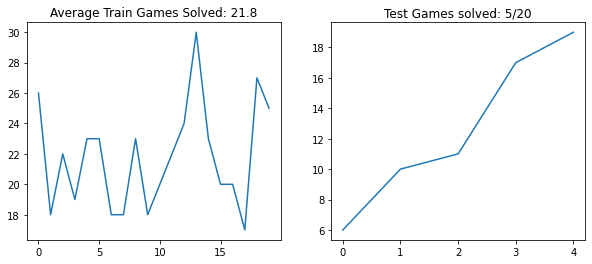

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(list(range(len(train_solves))), train_solves)
axs[0].set_title(f'Average Train Games Solved: {sum(train_solves)/iters}')
axs[1].plot(list(range(len(test_solves))), test_solves)
axs[1].set_title(f'Test Games solved: {len(test_solves)}/{iters}')

## A2C

In [6]:
model3 = a2c.A2CModel(dqn_config)

In [7]:
train_solves = []
test_solves = []
for i in range(iters):
    model3.train(trials)
    train_solves.append(len(model3.games_solved))
    res = model3.test(verbose=False)
    print(f'Games solved: {len(model3.games_solved)}/{trials}')
    print(f'Test solved: {i}: {res["solved"]}')
    if(res['solved']):
        test_solves.append(i)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


RuntimeError: Class values must be smaller than num_classes.